# Basic Machine Learning model

**Objective:**

Create a simple machine learning model to predict the survival of Titanic passengers using a
logistic regression classifier. I will be using the claned dataset from day 2. My main focu



In [13]:
#To import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
def wrangle(filepath):
    df = pd.read_csv(filepath)

    return df

In [54]:
df = wrangle(r"C:\Users\User\Desktop\100DayOfCode\Titanic_clean.csv")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [56]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Featue selection

During feature, I avoided features that are unique identifiers such as [ **PassengerId**, **Name**, **Ticket**]. 

This is because they have no direct predictive value for survival. They could also cause multicollinearlity problems

The heatmap correlation scale ranges from **-1**(perfect negative correlation) to **+1**(perfect positive correlation)

Setting 

**vmin = -1**: ensures that the color scale starts at **-1**, which is appropriate for correlation matrices. This ensures full coverage

**vmax = 1**:
 Sets the maximum value for the color scale.

**center = 0** :
Centers the color scale around 0


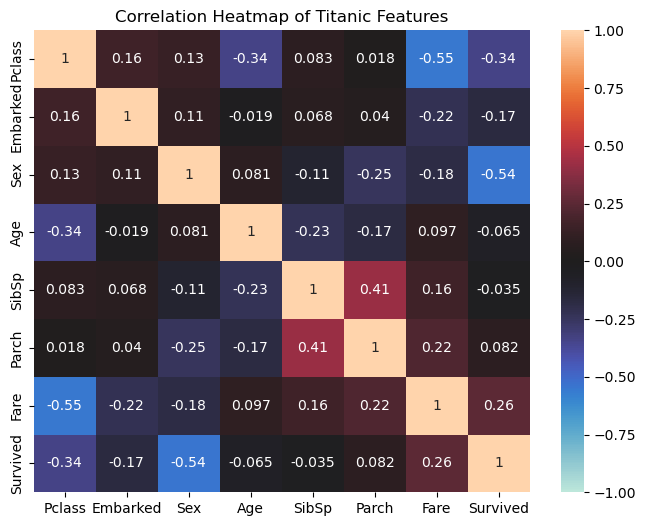

In [57]:
# Preparing data for correlation
features = ["Pclass", "Embarked", "Sex", "Age", "SibSp", "Parch","Fare", "Survived" ]
corr_data = df[features].copy()

# To encode categorical variables for correlation
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
corr_data["Sex"] = le_sex.fit_transform(corr_data["Sex"])
corr_data["Embarked"] = le_embarked.fit_transform(corr_data["Embarked"])

# To generate a correlation matrix
corr = corr_data.corr()

# To plot a heatmap
plt.figure(figsize = (8,6))
sns.heatmap(corr,annot = True, vmin=-1, vmax=1,center=0)
plt.title('Correlation Heatmap of Titanic Features')
plt.show();


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Embarked  891 non-null    int32  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Survived  891 non-null    int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [69]:
# To prepare the data
feature =["Pclass", "Embarked", "Sex", "Age", "SibSp", "Parch","Fare",]
X = df[feature]
y = df["Survived"]

# To encode categorical variable
la_sex = LabelEncoder()
la_embark = LabelEncoder()
X["Sex"] = la_sex.fit_transform(X["Sex"])
X["Embarked"] = la_embark.fit_transform(X["Embarked"])

# Train- test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# To train moel
model = LogisticRegression(max_iter = 200)
model.fit(X_train,y_train)

# To evaluate models performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[90 15]
 [19 55]]


C:\Users\User\AppData\Local\Temp\ipykernel_19396\3735636694.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = la_sex.fit_transform(X["Sex"])
C:\Users\User\AppData\Local\Temp\ipykernel_19396\3735636694.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"] = la_embark.fit_transform(X["Embarked"])
